In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
! pip install nltk
! pip install pandas openpyxl

In [40]:
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import dask.array as da
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [41]:
df = pd.read_csv('pizza_sales.csv')



In [42]:
df=df.drop(columns=['Unnamed: 0'])

In [43]:
df.head(20)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [44]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [45]:
df['order_date'].isnull().sum()

14656

In [46]:
df.dropna(inplace=True)

In [47]:
df['Month']=df['order_date'].dt.month
df['week_of_year']=df['order_date'].dt.isocalendar().week
df['day_of_year']=df['order_date'].dt.dayofyear
df['is_weekend']=df['order_date'].dt.dayofweek.isin([5, 6]).astype(int)

In [48]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [12]:
df=df.dropna()

In [49]:
df.to_csv('pizza_sales_cleaned.csv', index=False)

In [50]:
df=pd.read_csv('pizza_sales_cleaned.csv')

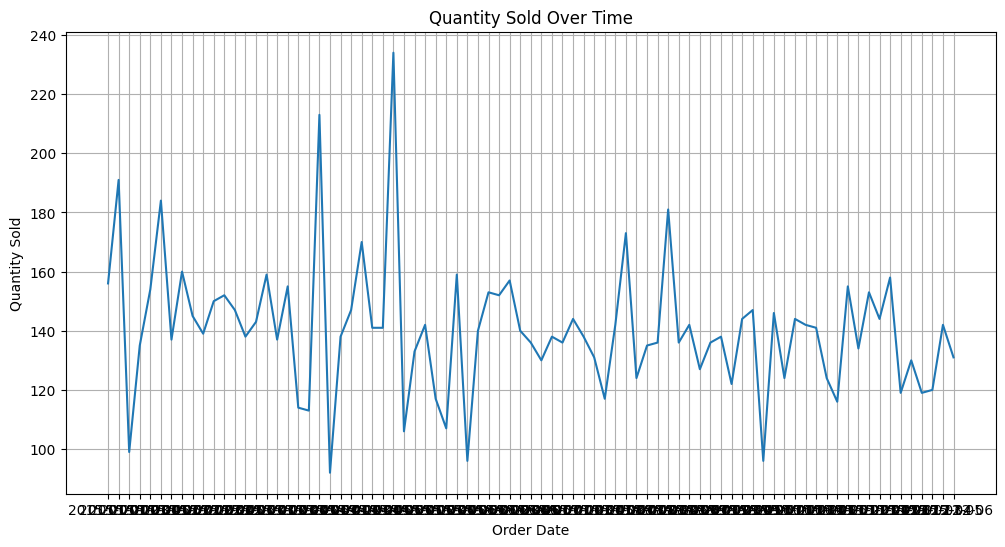

In [51]:
quantity_over_time = df.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

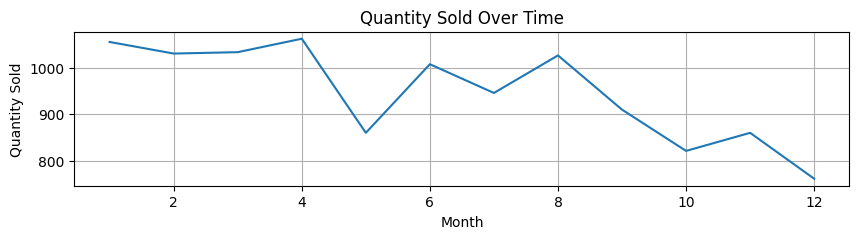

In [52]:
quantity_over_time = df.groupby('Month')['quantity'].sum()

# Create the plot
plt.figure(figsize=((10,2)))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

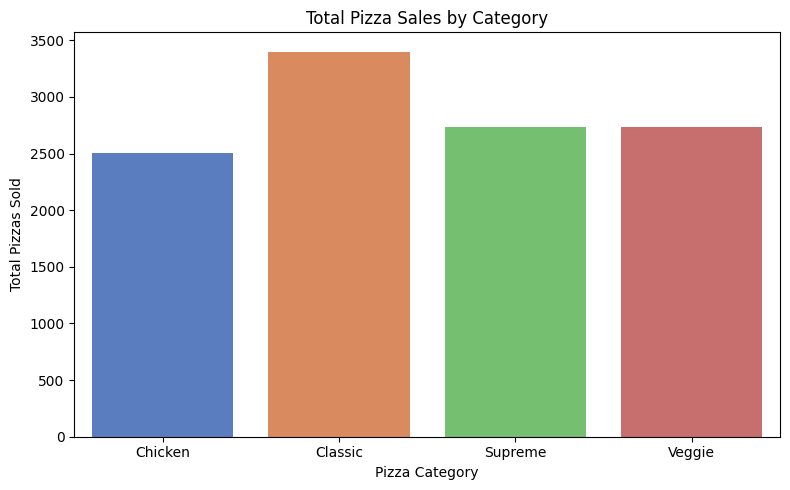

In [53]:
category_sales = df.groupby('pizza_category')['quantity'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="muted")
plt.title('Total Pizza Sales by Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

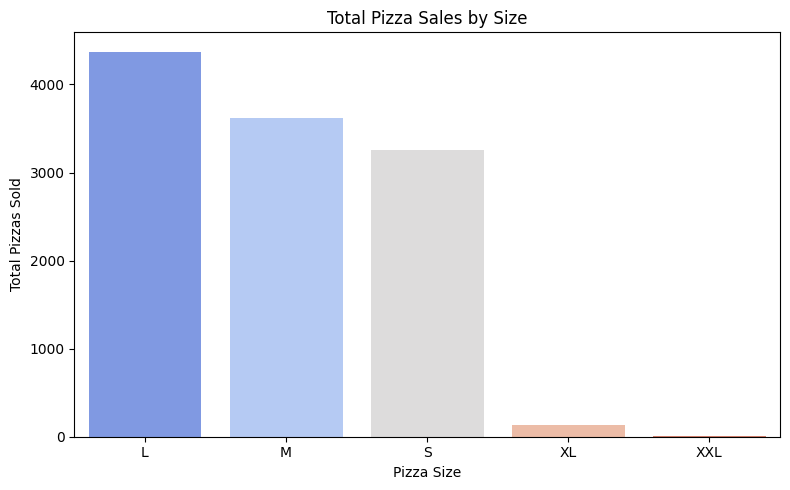

In [54]:
size_sales = df.groupby('pizza_size')['quantity'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=size_sales.index, y=size_sales.values, palette="coolwarm")
plt.title('Total Pizza Sales by Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

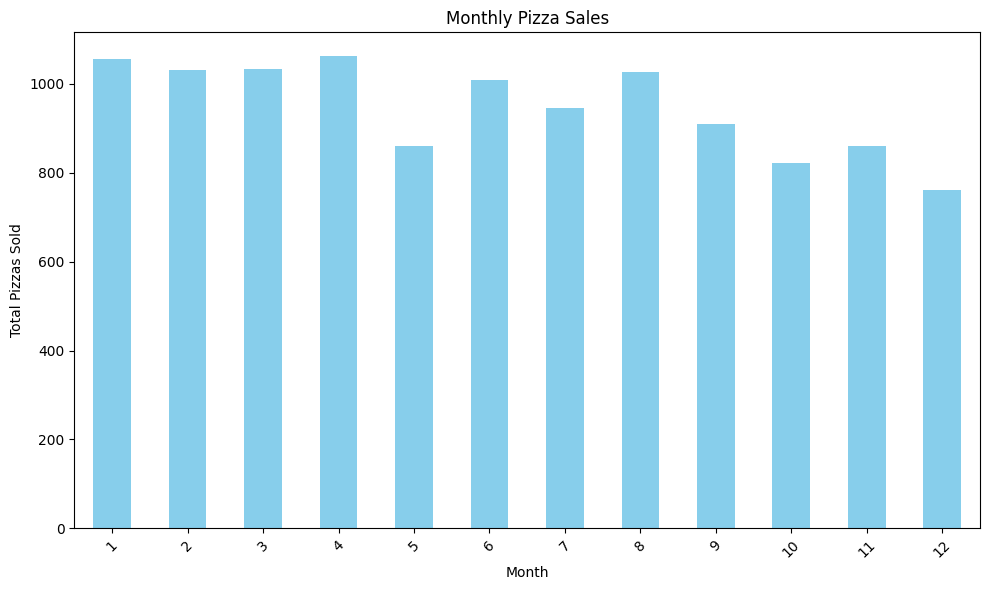

In [55]:
# Group sales by month to analyze seasonal trends
monthly_sales = df.groupby(df['Month'])['quantity'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Pizza Sales')
plt.xlabel('Month')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

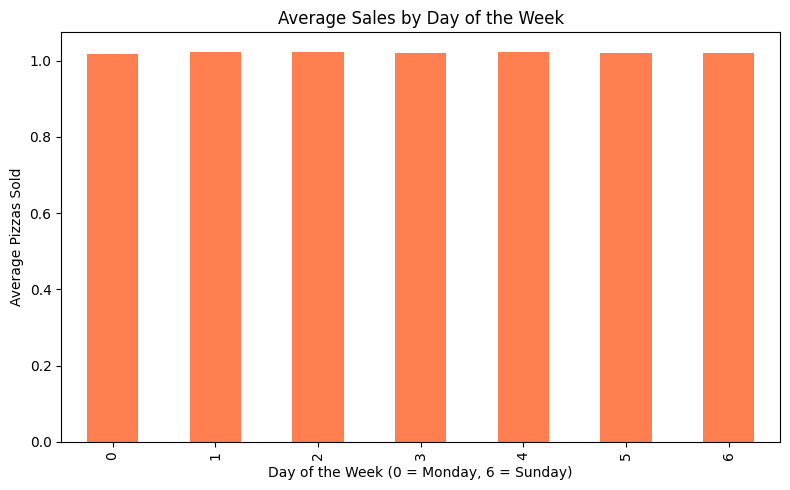

In [58]:
df['day_of_week'] = df['order_date'].dt.dayofweek

# Step 3: Group sales by 'day_of_week'
day_of_week_sales = df.groupby('day_of_week')['quantity'].mean()

# Step 4: Plot the sales by day of the week
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
day_of_week_sales.plot(kind='bar', color='coral')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Pizzas Sold')
plt.tight_layout()
plt.show()

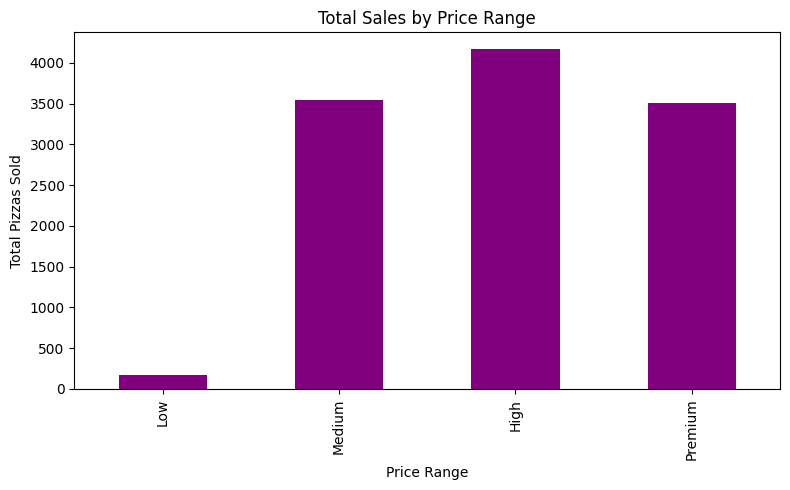

In [59]:
df['price_range'] = pd.cut(df['unit_price'], bins=[0, 10, 15, 20, 30], labels=['Low', 'Medium', 'High', 'Premium'])

# Group sales by price range
price_sales =df.groupby('price_range')['quantity'].sum()

# Plot sales by price range
plt.figure(figsize=(8, 5))
price_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

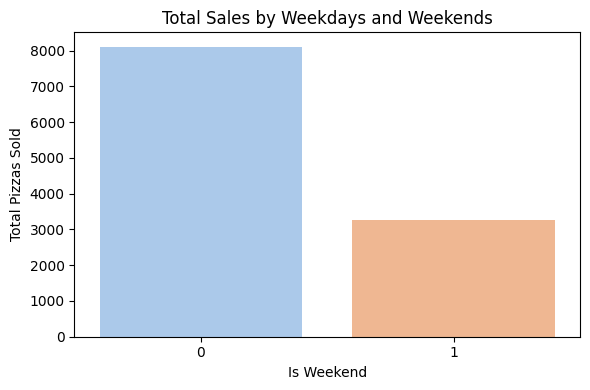

In [60]:
weekend_sales = df.groupby('is_weekend')['quantity'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="pastel")
plt.title('Total Sales by Weekdays and Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

In [27]:
pip install statsmodels


MAPE: 8.88%


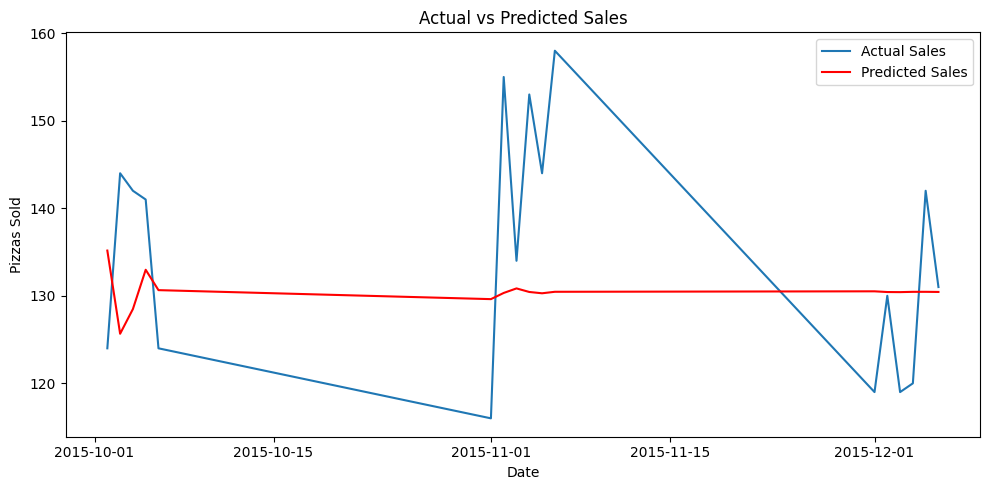

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Aggregating daily sales data
daily_sales = df.groupby('order_date')['quantity'].sum()

# Split data into train and test (80-20 split)
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # You can tune order (p, d, q) further
arima_model = model.fit()

# Predicting sales
predictions = arima_model.forecast(steps=len(test_data))

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(test_data, predictions)
print(f'MAPE: {mape * 100:.2f}%')


# Visualizing the predictions
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data.values, label='Actual Sales')
plt.plot(test_data.index, predictions, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Pizzas Sold')
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
df1=pd.read_csv('Pizza_ingredients.csv')

In [63]:
df1

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [64]:
df1.dtypes

,0
pizza_name_id,object
pizza_name,object
pizza_ingredients,object
Items_Qty_In_Grams,float64


In [77]:
# Assuming you predicted sales for 7 days, calculate ingredient needs based on the pizza ingredients

# Sales forecast for next 7 days (You can use your predictive model to forecast)
future_sales = arima_model.forecast(steps=7)



In [78]:
ingredient_forecast = pd.merge(df[['pizza_name_id', 'quantity']], df1, on='pizza_name_id')

# Calculate required quantities of ingredients for predicted sales
ingredient_forecast['total_ingredient_qty'] = ingredient_forecast['Items_Qty_In_Grams'] * ingredient_forecast['quantity']

# Group by ingredients to get the total quantity needed
purchase_order = ingredient_forecast.groupby('pizza_ingredients')['total_ingredient_qty'].sum()

# Display the final purchase order
print("\nPurchase Order for Ingredients:")
print(purchase_order)


Purchase Order for Ingredients:
pizza_ingredients
?duja Salami                 9400.0
Alfredo Sauce                3715.0
Anchovies                    8765.0
Artichokes                  29160.0
Arugula                      3525.0
                             ...   
Sun-dried Tomatoes           4230.0
Thai Sweet Chilli Sauce     12460.0
Thyme                         610.0
Tomatoes                   136220.0
Zucchini                    11590.0
Name: total_ingredient_qty, Length: 64, dtype: float64


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Example actual sales data for the next 7 days
# Replace this with your actual sales data
actual_sales_df = pd.DataFrame({
    'date': pd.date_range(start='2024-12-15', periods=7, freq='D'),
    'quantity': [50, 55, 60, 65, 70, 75, 100]  # Example quantities
})
actual_sales_df.set_index('date', inplace=True)



In [80]:
forecasted_sales = pd.Series([52, 56, 63, 69, 73, 78, 82], index=actual_sales_df.index)

# Extract actual sales quantities
actual_sales = actual_sales_df['quantity']

# Calculate errors
mae = mean_absolute_error(actual_sales, forecasted_sales)
mse = mean_squared_error(actual_sales, forecasted_sales)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4.857142857142857
Mean Squared Error (MSE): 53.142857142857146
Root Mean Squared Error (RMSE): 7.289914755527471


In [81]:
# Generate the purchase order
purchase_order_df = pd.DataFrame(purchase_order).reset_index()
purchase_order_df.columns = ['Ingredient', 'Total_Quantity_Required']

# Save the purchase order as a CSV file
purchase_order_df.to_csv('Pizza_Purchase_Order1.csv', index=False)

print("\nPurchase Order Generated and Saved as 'Pizza_Purchase_Order1.csv'")


Purchase Order Generated and Saved as 'Pizza_Purchase_Order1.csv'


In [72]:
p = pd.read_csv('Pizza_Purchase_Order1.csv')

In [74]:
p

,Ingredient,Total_Quantity_Required
0,?duja Salami,9400.0
1,Alfredo Sauce,3715.0
2,Anchovies,8765.0
3,Artichokes,29160.0
4,Arugula,3525.0
...,...,...
59,Sun-dried Tomatoes,4230.0
60,Thai Sweet Chilli Sauce,12460.0
61,Thyme,610.0
62,Tomatoes,136220.0
